In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the 'north.csv' file
north_data = pd.read_csv('./dataset/north.csv')

# Specify the directory where you want to save the 'north.csv' file
output_directory = '/content/drive/Shareddrives/Machine_Learning Data cleaning/'

# Specify the output file path including the filename
output_file_path = output_directory + 'north.csv'

# Write the 'north.csv' data to the specified directory
north_data.to_csv(output_file_path, index=False)

print(f"File 'north.csv' saved to {output_file_path}")


File 'north.csv' saved to /content/drive/Shareddrives/Machine_Learning Data cleaning/north.csv


***Converting from Brazillian to English***

In [ ]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file name downloaded
file_path = '/content/drive/Shareddrives/Machine_Learning Data cleaning/north.csv'
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Define the translation dictionary for column names
translation_dict = {
    'index': 'index',
    'Data': 'date',
    'Hora': 'hour',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)' : 'Amount of precipitation in millimeters (last hour)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)':'Atmospheric pressure at station level (mb)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)':'Maximum air pressure for the last hour in hPa to tenths',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)':'Minimum air pressure for the last hour in hPa to tenths',
    'RADIACAO GLOBAL (Kj/m²)':'Solar radiation KJ/m2',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)' : 'Air temperature (instant) in celsius degrees',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)':'Dew point temperature (instant) in celsius degrees',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)':'Maximum temperature for the last hour in celsius degrees',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)':'Minimum temperature for the last hour in celsius degrees',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)':'Maximum dew point temperature for the last hour in celsius degrees',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)':'Minimum dew point temperature for the last hour in celsius degrees',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)':'Maximum relative humidity temperature for the last hour in %',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)':'Minimum relative humidity temperature for the last hour in %',
    'UMIDADE RELATIVA DO AR, HORARIA (%)':'Relative humidity in % (instant)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))':'Wind direction in radius degrees (0-360)',
    'VENTO, RAJADA MAXIMA (m/s)':'Wind gust in meters per second',
    'VENTO, VELOCIDADE HORARIA (m/s)':'Wind speed in meters per second',

}

# Rename columns using the translation dictionary
df.rename(columns=translation_dict, inplace=True)
# Print each column name for one row after renaming
print(df.columns.tolist())

# Save the DataFrame with the updated column names
df.to_csv('/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english.csv', index=False)

print("Column names updated and file saved.")

print(df.head())

['index', 'date', 'hour', 'Amount of precipitation in millimeters (last hour)', 'Atmospheric pressure at station level (mb)', 'Maximum air pressure for the last hour in hPa to tenths', 'Minimum air pressure for the last hour in hPa to tenths', 'Solar radiation KJ/m2', 'Air temperature (instant) in celsius degrees', 'Dew point temperature (instant) in celsius degrees', 'Maximum temperature for the last hour in celsius degrees', 'Minimum temperature for the last hour in celsius degrees', 'Maximum dew point temperature for the last hour in celsius degrees', 'Minimum dew point temperature for the last hour in celsius degrees', 'Maximum relative humidity temperature for the last hour in %', 'Minimum relative humidity temperature for the last hour in %', 'Relative humidity in % (instant)', 'Wind direction in radius degrees (0-360)', 'Wind gust in meters per second', 'Wind speed in meters per second', 'region', 'state', 'station', 'station_code', 'latitude', 'longitude', 'height']
Column name

# ***Separating date and time into numerical values each***


In [ ]:
# Extract year, month, and day
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day
# Dropped region, state, station and station code
df = df.drop(['date'], axis=1)

# Print the updated DataFrame
print(df.head())


    hour  Amount of precipitation in millimeters (last hour)  \
0  00:00                                            -9999.0    
1  01:00                                            -9999.0    
2  02:00                                            -9999.0    
3  03:00                                            -9999.0    
4  04:00                                            -9999.0    

   Atmospheric pressure at station level (mb)  \
0                                     -9999.0   
1                                     -9999.0   
2                                     -9999.0   
3                                     -9999.0   
4                                     -9999.0   

   Maximum air pressure for the last hour in hPa to tenths  \
0                                            -9999.0         
1                                            -9999.0         
2                                            -9999.0         
3                                            -9999.0         
4         

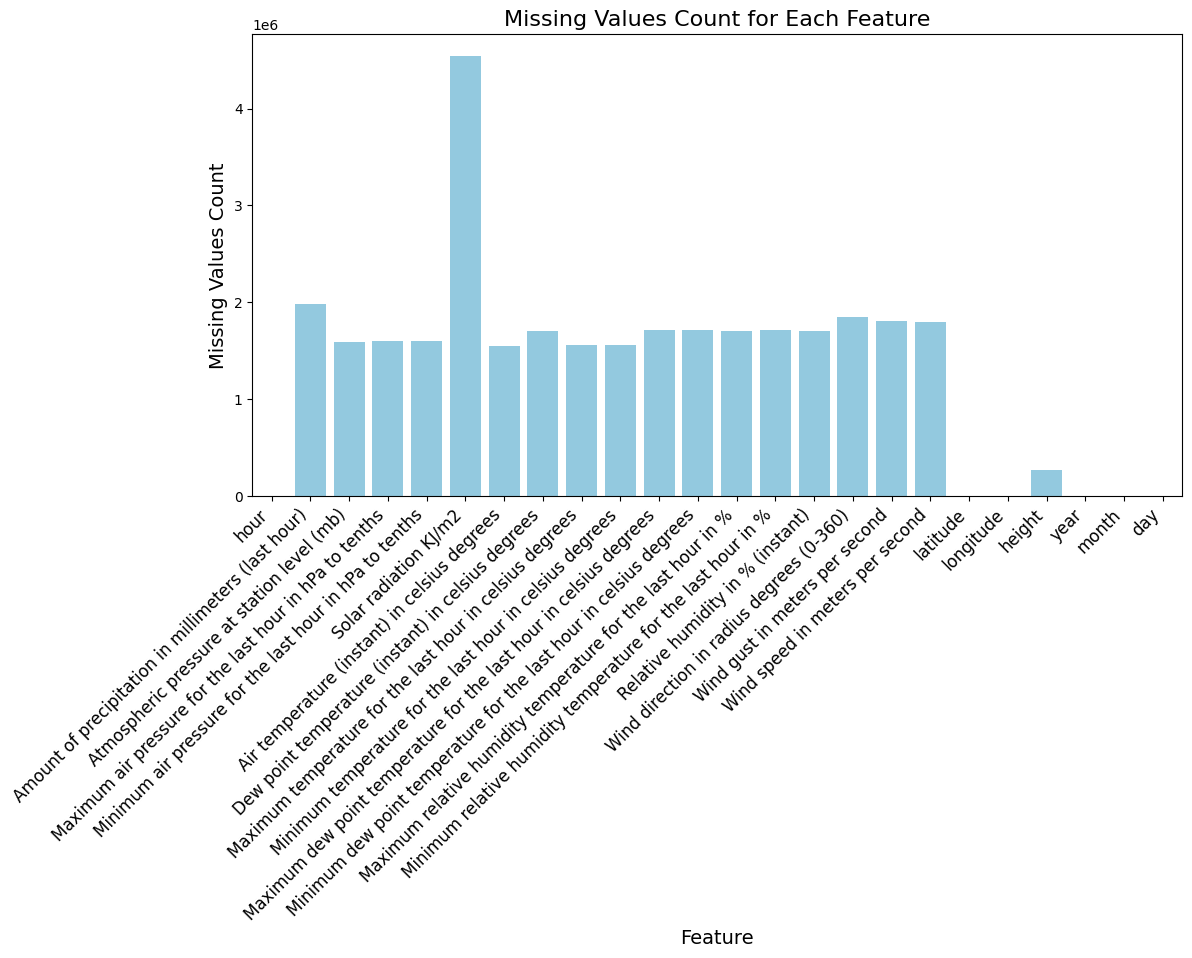

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Replace -9999 with NaN for missing value representation
df.replace(-9999, float('nan'), inplace=True)
missing_values_count = df.isnull().sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, color='skyblue')
plt.title('Missing Values Count for Each Feature', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Missing Values Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [ ]:
import pandas as pd

# Provide the file path
file_path = "/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
print(df.head())


   index        date   hour  \
0      0  2000-05-09  00:00   
1      1  2000-05-09  01:00   
2      2  2000-05-09  02:00   
3      3  2000-05-09  03:00   
4      4  2000-05-09  04:00   

   Amount of precipitation in millimeters (last hour)  \
0                                            -9999.0    
1                                            -9999.0    
2                                            -9999.0    
3                                            -9999.0    
4                                            -9999.0    

   Atmospheric pressure at station level (mb)  \
0                                     -9999.0   
1                                     -9999.0   
2                                     -9999.0   
3                                     -9999.0   
4                                     -9999.0   

   Maximum air pressure for the last hour in hPa to tenths  \
0                                            -9999.0         
1                                            -9999.

# ***Data nominal features range and Data graphs and range before interpolation***

index, Range: [0 - 420392]
date, Range: [2000-05-09 - 2021-04-30]
hour, Range: [00:00 - 23:00]
Amount of precipitation in millimeters (last hour), Range: [-9999.0 - 97.2]
Atmospheric pressure at station level (mb), Range: [-9999.0 - 1050.0]
Maximum air pressure for the last hour in hPa to tenths, Range: [-9999.0 - 1049.8]
Minimum air pressure for the last hour in hPa to tenths, Range: [-9999.0 - 1050.0]
Solar radiation KJ/m2, Range: [-9999 - 45305]
Air temperature (instant) in celsius degrees, Range: [-9999.0 - 42.2]
Dew point temperature (instant) in celsius degrees, Range: [-9999.0 - 43.5]
Maximum temperature for the last hour in celsius degrees, Range: [-9999.0 - 45.0]
Minimum temperature for the last hour in celsius degrees, Range: [-9999.0 - 45.0]
Maximum dew point temperature for the last hour in celsius degrees, Range: [-9999.0 - 44.4]
Minimum dew point temperature for the last hour in celsius degrees, Range: [-9999.0 - 39.8]
Maximum relative humidity temperature for the last ho

<ipython-input-4-a603f5624ff0>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()[label_column]


Correlation with the label:
index: 0.01655136
hour: 0.02720916
Amount of precipitation in millimeters (last hour): 0.85199406
Atmospheric pressure at station level (mb): 0.98145075
Maximum air pressure for the last hour in hPa to tenths: 0.97897956
Minimum air pressure for the last hour in hPa to tenths: 0.97898749
Solar radiation KJ/m2: 0.42517717
Air temperature (instant) in celsius degrees: 1.00000000
Dew point temperature (instant) in celsius degrees: 0.94254793
Maximum temperature for the last hour in celsius degrees: 0.99710749
Minimum temperature for the last hour in celsius degrees: 0.99710291
Maximum dew point temperature for the last hour in celsius degrees: 0.93987569
Minimum dew point temperature for the last hour in celsius degrees: 0.93924402
Maximum relative humidity temperature for the last hour in %: 0.94071167
Minimum relative humidity temperature for the last hour in %: 0.93920522
Relative humidity in % (instant): 0.94105246
Wind direction in radius degrees (0-360): 

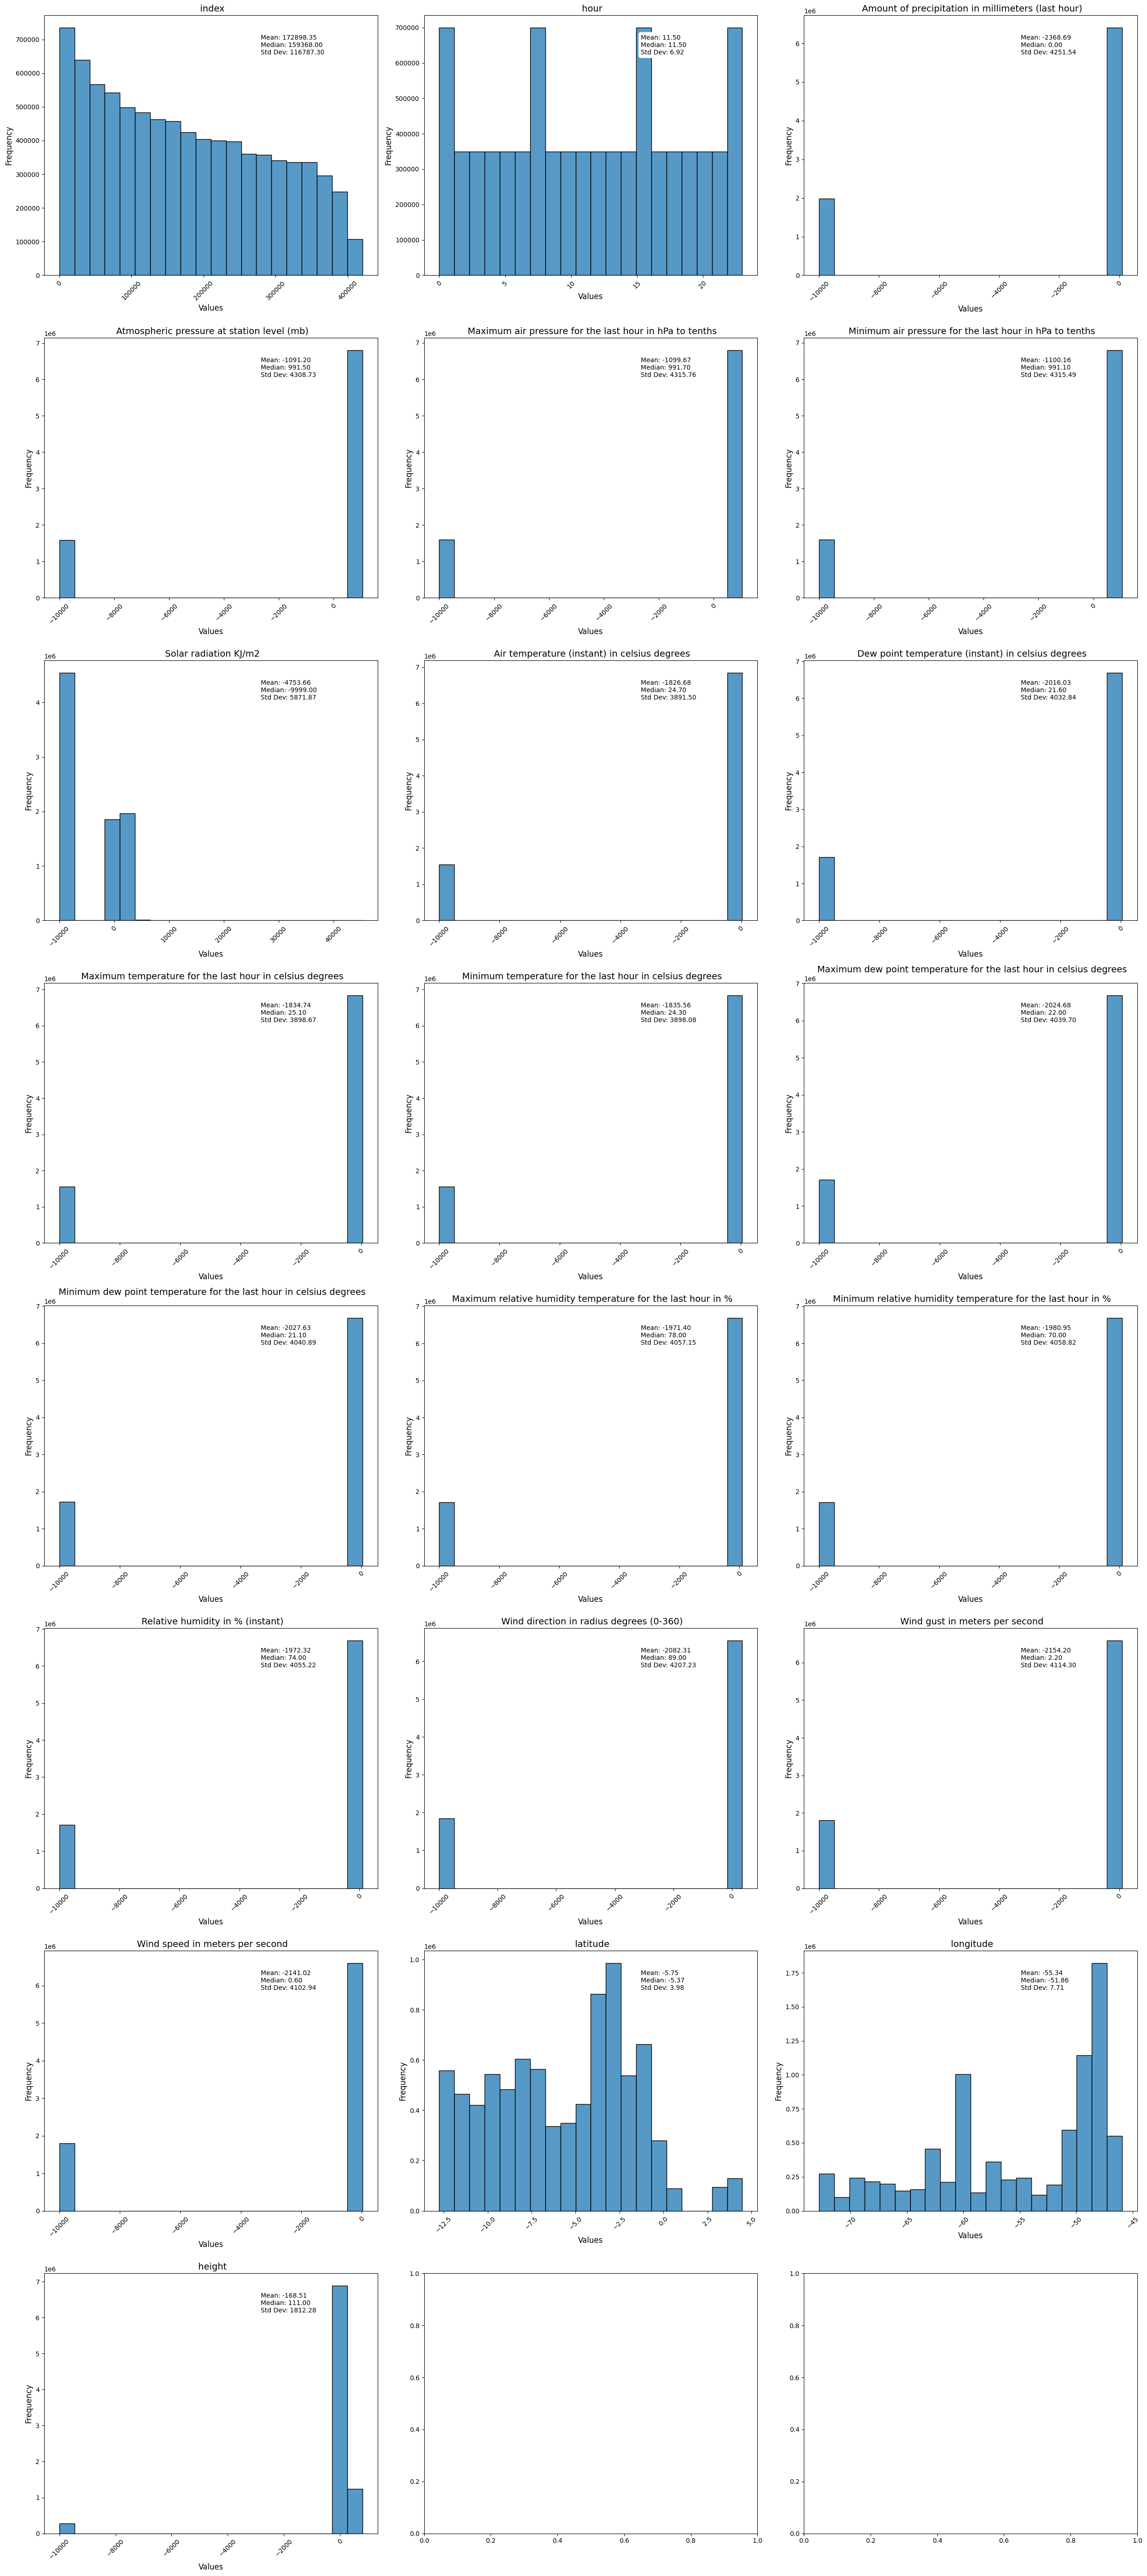

In [ ]:
def feature_ranges(dataframe):
    for column in dataframe.columns:
        min_value = dataframe[column].min()
        max_value = dataframe[column].max()
        print(f"{column}, Range: [{min_value} - {max_value}]")

# Apply the function to your dataset
feature_ranges(df)

#label_column = 'Air temperature (instant) in celsius degrees'
label_column = 'Air temperature (instant) in celsius degrees'
# Calculate the correlation between each feature and the label
df['hour'] = pd.to_datetime(df['hour']).dt.hour
correlations = df.corr()[label_column]

# Display the correlation values

print("Correlation with the label:")
for feature, correlation in correlations.items():
    print(f"{feature}: {correlation:.8f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for subplots
num_rows = (len(numeric_columns) - 1) // 3 + 1
num_cols = min(len(numeric_columns), 3)

# Increase figure size and adjust layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 7 * num_rows))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through selected numeric columns
for i, col in enumerate(numeric_columns):
    # Plot histogram
    sns.histplot(df[col], bins=20, edgecolor='black', ax=axes[i])

    # Set subplot titles and labels
    axes[i].set_title(f' {col}', fontsize=14)
    axes[i].set_xlabel('Values', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Add statistical annotations
    mean_value = df[col].mean()
    median_value = df[col].median()
    std_dev = df[col].std()

    axes[i].annotate(f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}\nStd Dev: {std_dev:.2f}',
                     xy=(0.65, 0.85), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white"),
                     fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


***Perfrom Linear Interpolation to fill in missing vals***

In [ ]:
# Perform linear interpolation for each feature
df.interpolate(method='linear', inplace=True)

# Save the DataFrame with the interpolated values
df.to_csv('/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english_interpolated.csv', index=False)

print("Linear interpolation performed, and file saved.")

Linear interpolation performed, and file saved.


***Recheck missing values***

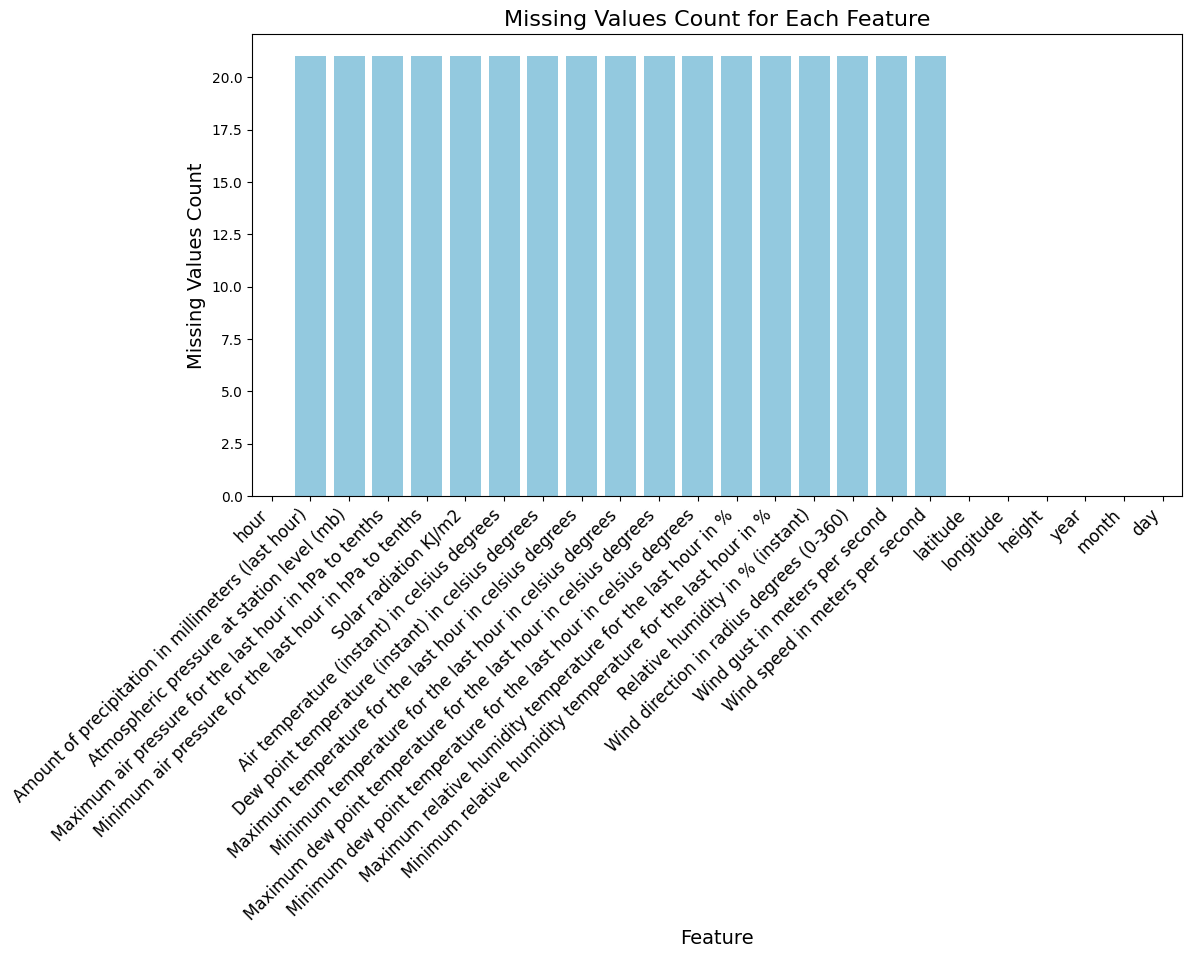

In [ ]:
missing_values_count = df.isnull().sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, color='skyblue')
plt.title('Missing Values Count for Each Feature', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Missing Values Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [ ]:
df.dropna(inplace=True)

# Save the DataFrame with dropped rows
df.to_csv('/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english_interpolated.csv', index=False)

print("Rows with missing values dropped, and file saved.")

Rows with missing values dropped, and file saved.


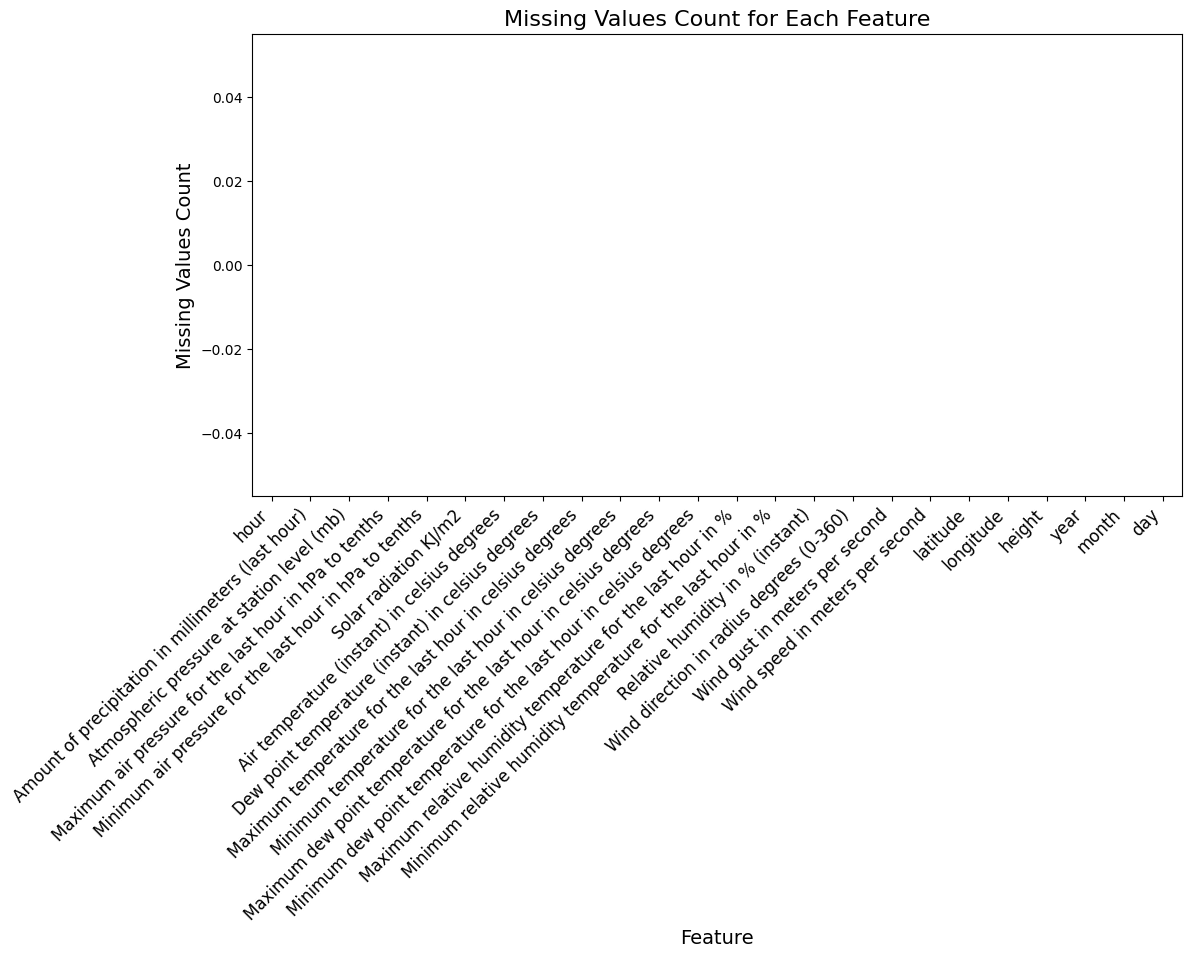

In [ ]:
missing_values_count = df.isnull().sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, color='skyblue')
plt.title('Missing Values Count for Each Feature', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Missing Values Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

# ***Unique Values for Nominal after Interpolation***

In [ ]:
def feature_ranges(dataframe):
    for column in dataframe.columns:
        min_value = dataframe[column].min()
        max_value = dataframe[column].max()
        print(f"{column}, Range: [{min_value} - {max_value}]")

# Apply the function to your dataset
feature_ranges(df)


hour, Range: [00:00 - 23:00]
Amount of precipitation in millimeters (last hour), Range: [0.0 - 97.2]
Atmospheric pressure at station level (mb), Range: [852.1 - 1050.0]
Maximum air pressure for the last hour in hPa to tenths, Range: [832.0 - 1049.8]
Minimum air pressure for the last hour in hPa to tenths, Range: [830.1 - 1050.0]
Solar radiation KJ/m2, Range: [0.0 - 45305.0]
Air temperature (instant) in celsius degrees, Range: [-9.0 - 42.2]
Dew point temperature (instant) in celsius degrees, Range: [-10.0 - 43.5]
Maximum temperature for the last hour in celsius degrees, Range: [0.0 - 45.0]
Minimum temperature for the last hour in celsius degrees, Range: [-5.6 - 45.0]
Maximum dew point temperature for the last hour in celsius degrees, Range: [-10.0 - 44.4]
Minimum dew point temperature for the last hour in celsius degrees, Range: [-10.0 - 39.8]
Maximum relative humidity temperature for the last hour in %, Range: [7.0 - 100.0]
Minimum relative humidity temperature for the last hour in %, 

***Correlation with label***


In [ ]:
#label_column = 'Air temperature (instant) in celsius degrees'
label_column = 'Air temperature (instant) in celsius degrees'
# Calculate the correlation between each feature and the label
df['hour'] = pd.to_datetime(df['hour']).dt.hour
correlations = df.corr()[label_column]

# Display the correlation values

print("Correlation with the label:")
for feature, correlation in correlations.items():
    print(f"{feature}: {correlation:.8f}")



Correlation with the label:
hour                                                                  0.453901
Amount of precipitation in millimeters (last hour)                   -0.085408
Atmospheric pressure at station level (mb)                            0.143381
Maximum air pressure for the last hour in hPa to tenths               0.153168
Minimum air pressure for the last hour in hPa to tenths               0.149307
Solar radiation KJ/m2                                                 0.451394
Air temperature (instant) in celsius degrees                          1.000000
Dew point temperature (instant) in celsius degrees                   -0.021318
Maximum temperature for the last hour in celsius degrees              0.958880
Minimum temperature for the last hour in celsius degrees              0.958421
Maximum dew point temperature for the last hour in celsius degrees    0.049123
Minimum dew point temperature for the last hour in celsius degrees   -0.076124
Maximum relative humidit

# ***Start From Here every time***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Dropping two features and saving the dataset***
***Maximum temperature for the last hour in celsius degrees***           
***Minimum temperature for the last hour in celsius degrees ***


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english_interpolated.csv'
df = pd.read_csv(file_path)

# Display the head of the dataset
print("Head of the dataset:")
print(df.head())

# Display the number of rows in the dataset
num_rows = len(df)
print(f"\nNumber of rows in the dataset: {num_rows}")

# Display the number of missing values for each column
missing_values = df.isnull().sum()
print("\nNumber of missing values for each column:")
print(missing_values)

# Drop the specified columns
columns_to_drop = ['Maximum temperature for the last hour in celsius degrees',
                   'Minimum temperature for the last hour in celsius degrees']
df = df.drop(columns=columns_to_drop)

# Display the head of the dataset after dropping columns
print("\nHead of the dataset after dropping columns:")
print(df.head())

# Save the modified DataFrame to the same file path
df.to_csv(file_path, index=False)


Head of the dataset:
   hour  Amount of precipitation in millimeters (last hour)  \
0    21                                                0.0    
1    22                                                0.0    
2    23                                                0.0    
3     0                                                0.0    
4     1                                                0.0    

   Atmospheric pressure at station level (mb)  \
0                                      1002.6   
1                                      1002.8   
2                                      1003.8   
3                                      1004.6   
4                                      1005.5   

   Maximum air pressure for the last hour in hPa to tenths  \
0                                             1002.8         
1                                             1002.8         
2                                             1003.8         
3                                             1004.6     

# ***Distribution of data for each feature after performing Linear Interpolation ***

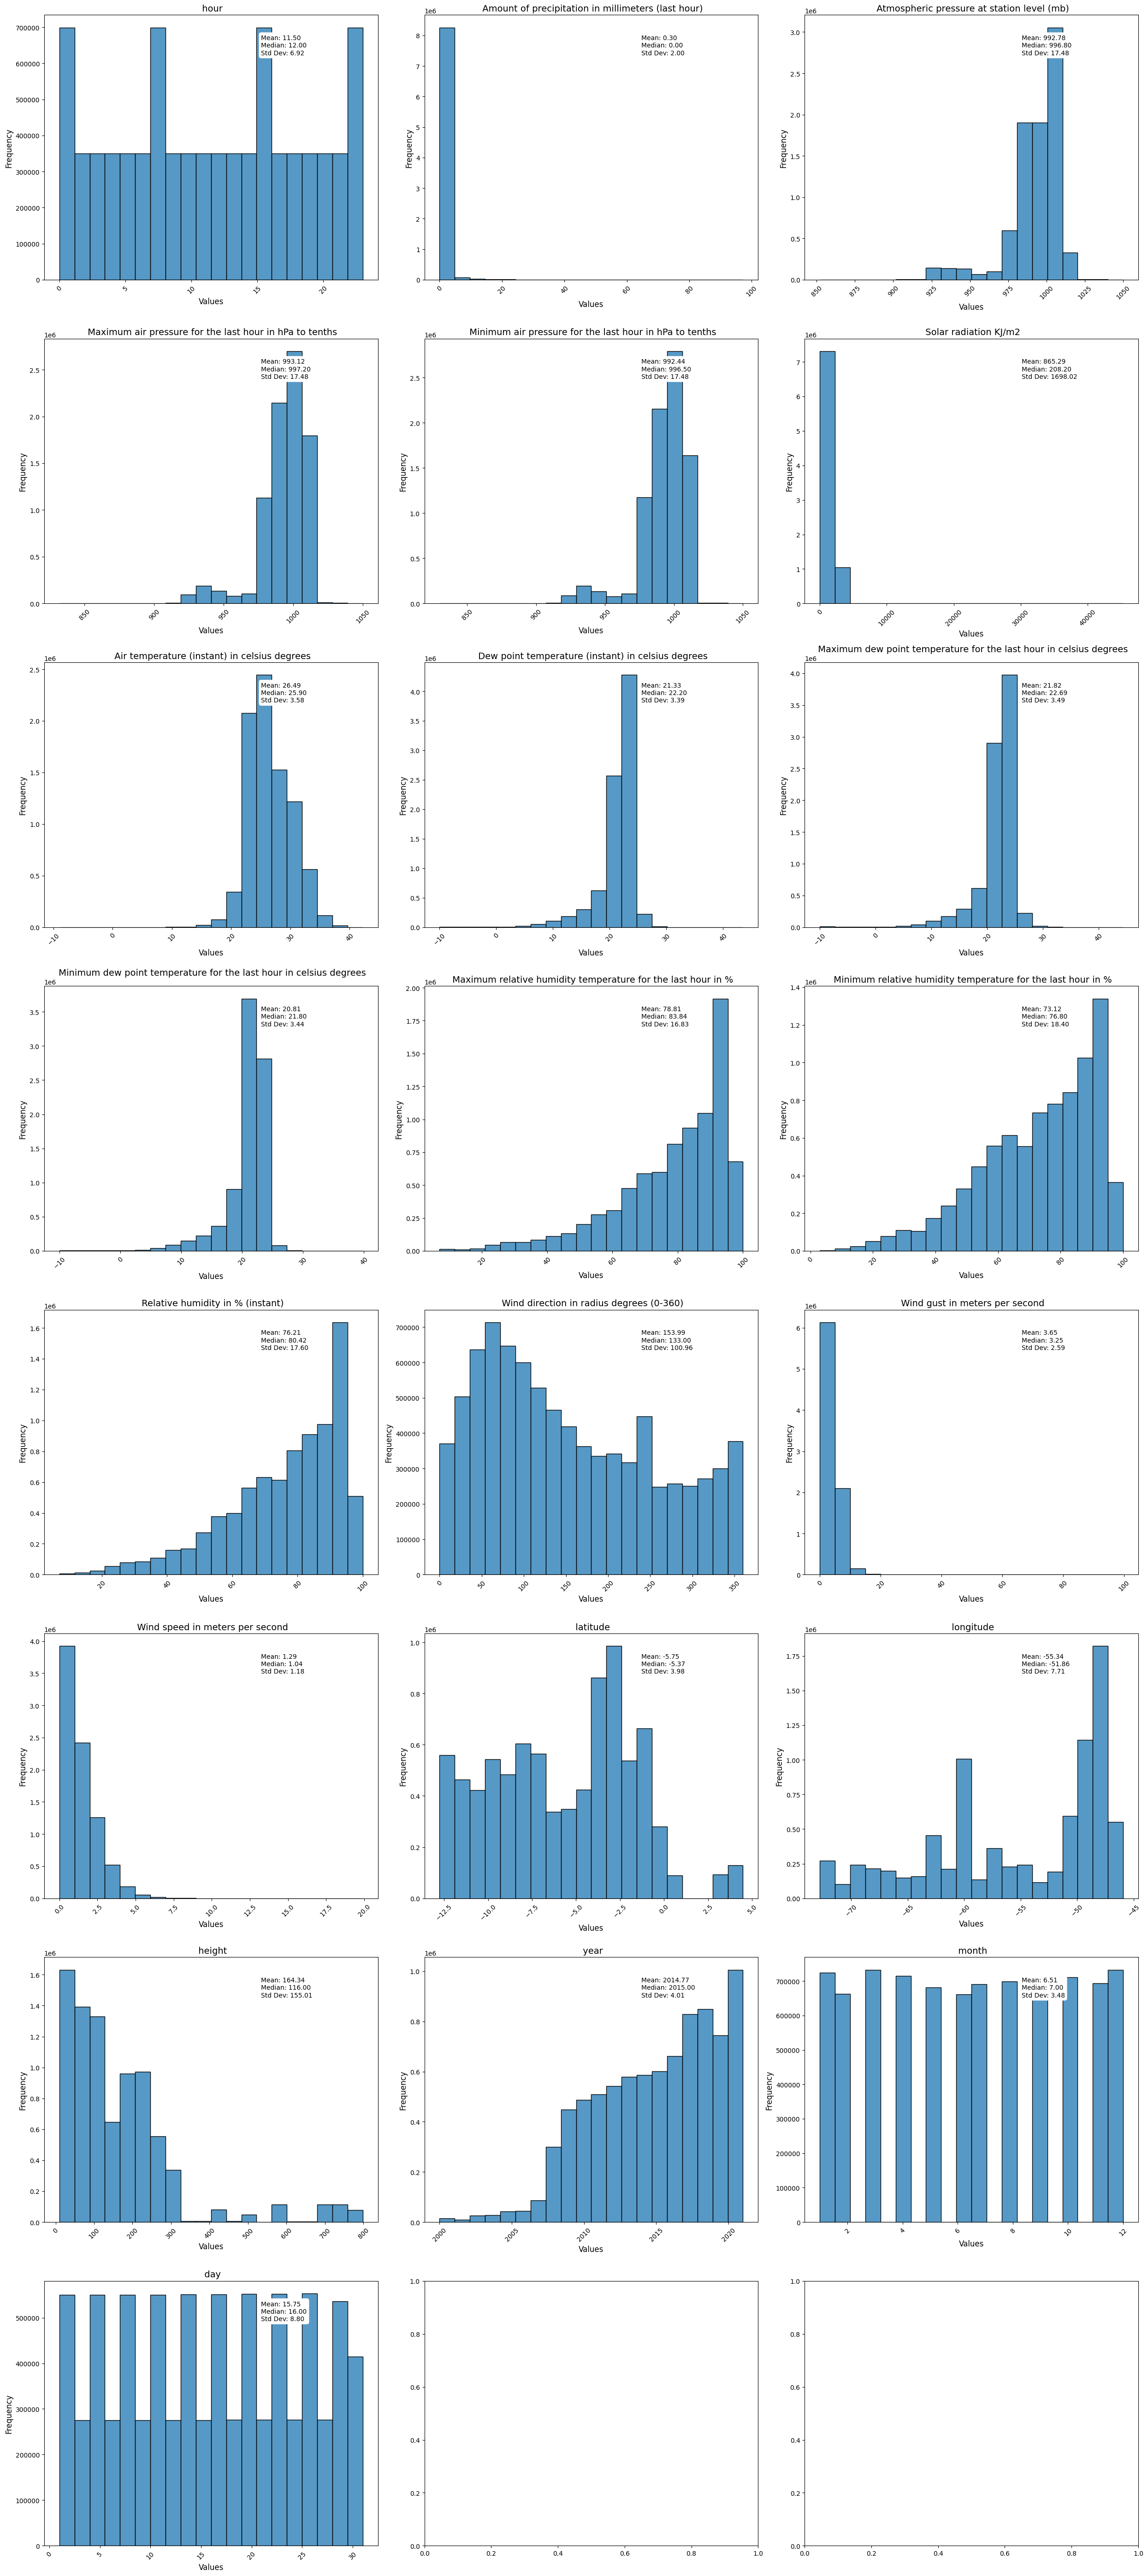

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english_interpolated.csv'
df = pd.read_csv(file_path)

# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for subplots
num_rows = (len(numeric_columns) - 1) // 3 + 1
num_cols = min(len(numeric_columns), 3)

# Increase figure size and adjust layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 7 * num_rows))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through selected numeric columns
for i, col in enumerate(numeric_columns):
    # Plot histogram
    sns.histplot(df[col], bins=20, edgecolor='black', ax=axes[i])

    # Set subplot titles and labels
    axes[i].set_title(f' {col}', fontsize=14)
    axes[i].set_xlabel('Values', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Add statistical annotations
    mean_value = df[col].mean()
    median_value = df[col].median()
    std_dev = df[col].std()

    axes[i].annotate(f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}\nStd Dev: {std_dev:.2f}',
                     xy=(0.65, 0.85), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white"),
                     fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# ***Another Visulization for Data Distrubtions ***

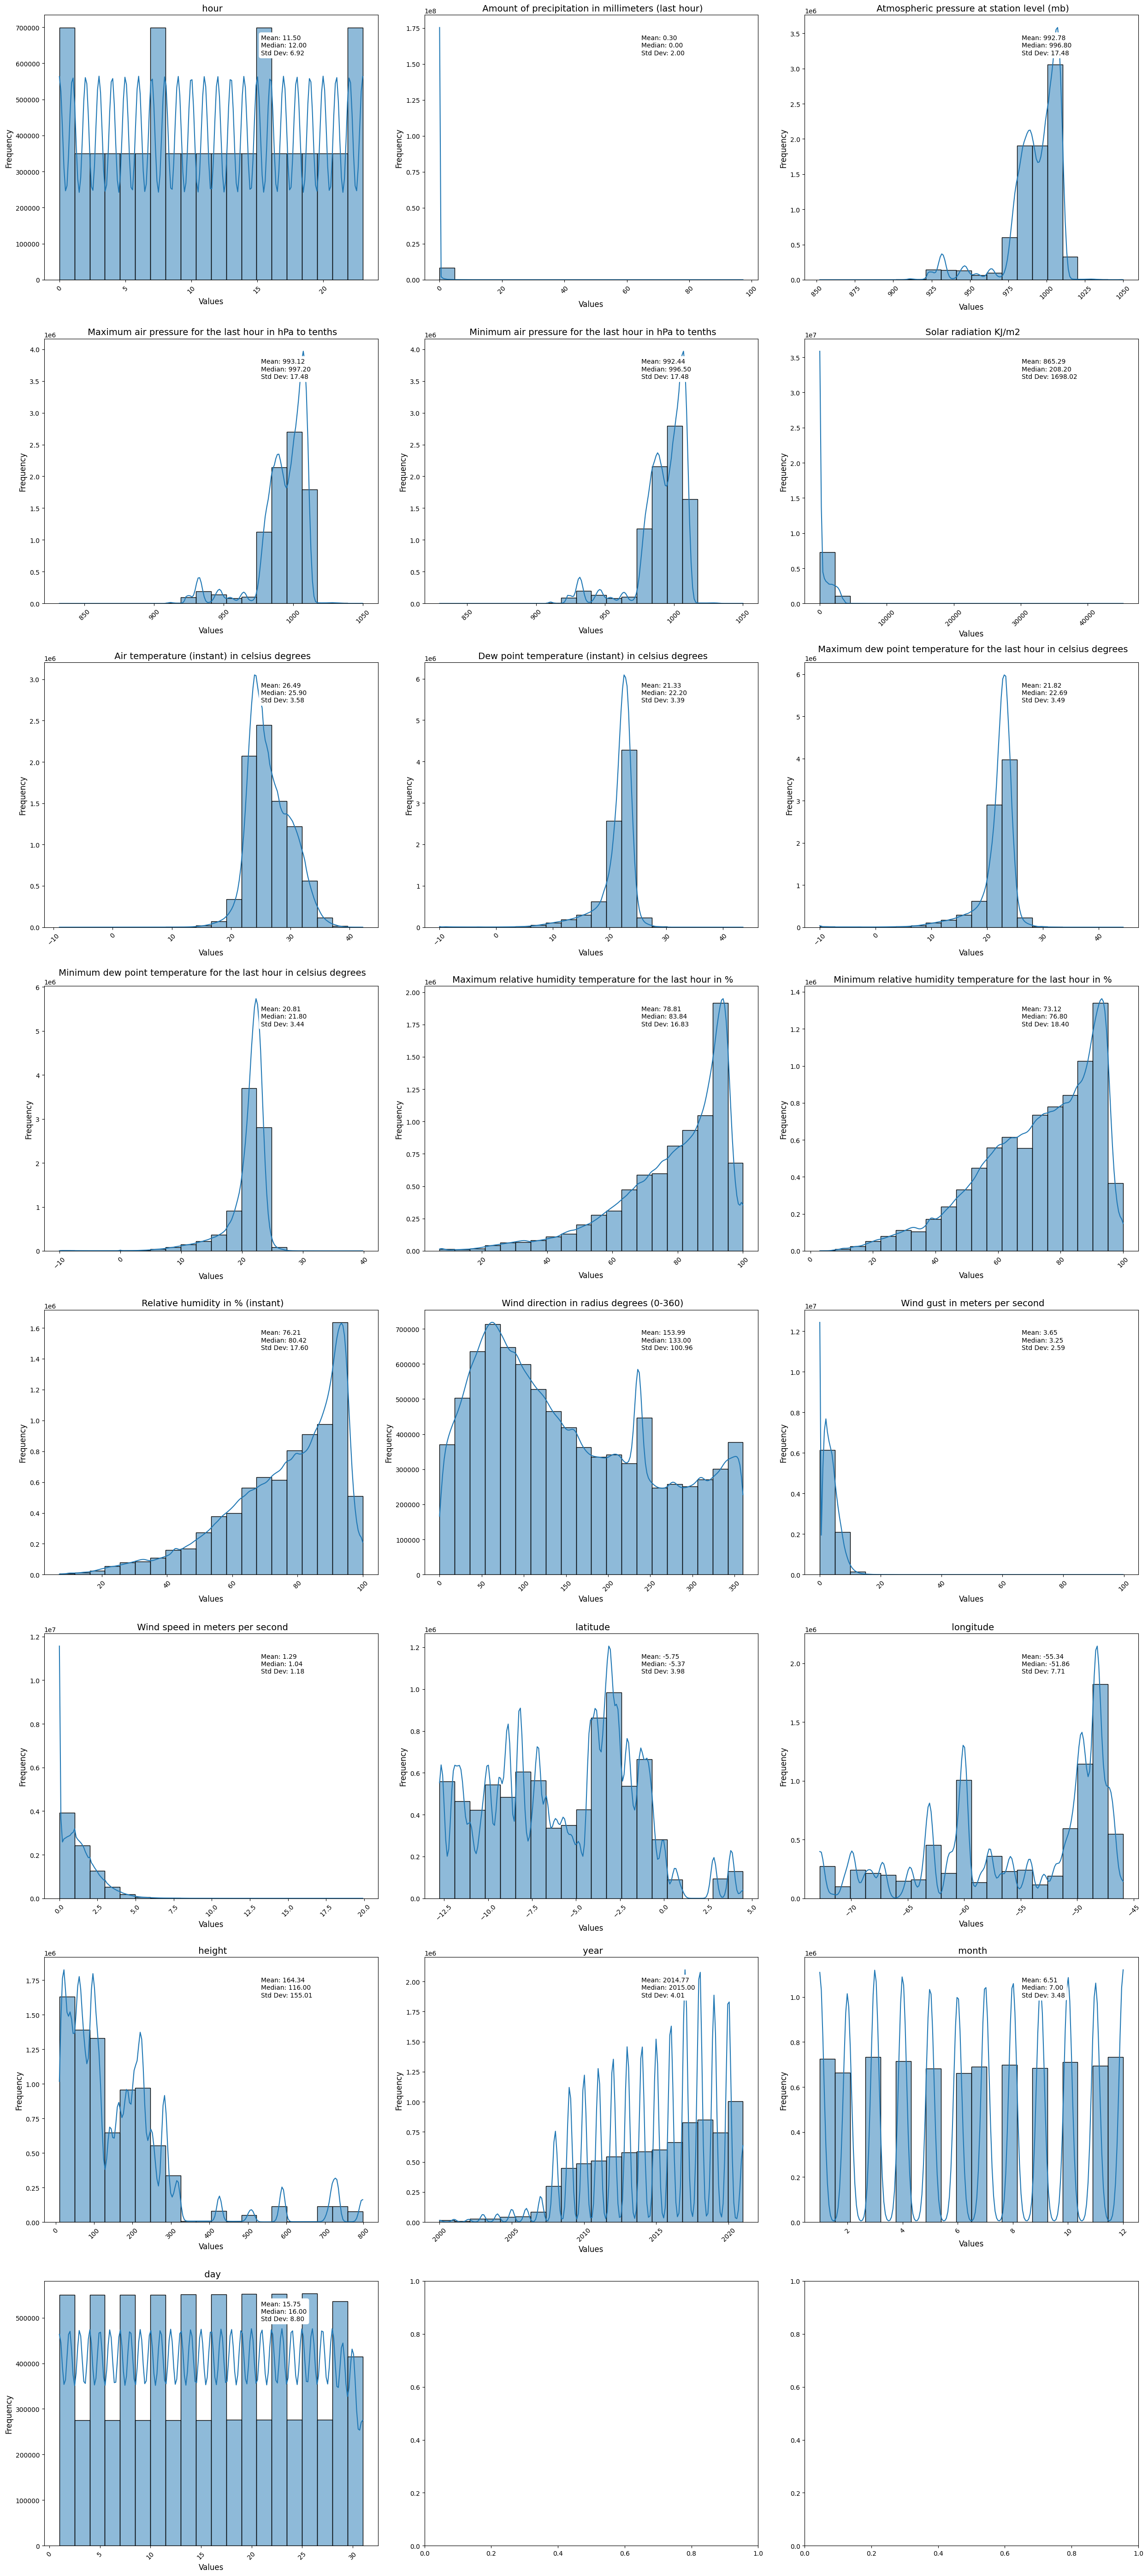

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english_interpolated.csv'
df = pd.read_csv(file_path)

# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for subplots
num_rows = (len(numeric_columns) - 1) // 3 + 1
num_cols = min(len(numeric_columns), 3)

# Increase figure size and adjust layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 7 * num_rows))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through selected numeric columns
for i, col in enumerate(numeric_columns):
    # Plot histogram with KDE
    sns.histplot(df[col], bins=20, kde=True, edgecolor='black', ax=axes[i])

    # Set subplot titles and labels
    axes[i].set_title(f' {col}', fontsize=14)
    axes[i].set_xlabel('Values', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Add statistical annotations
    mean_value = df[col].mean()
    median_value = df[col].median()
    std_dev = df[col].std()

    axes[i].annotate(f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}\nStd Dev: {std_dev:.2f}',
                     xy=(0.65, 0.85), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white"),
                     fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# ***Install Fitter***

In [ ]:
!pip install fitter

***Best Fit for Each Feature***

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
print(get_distributions())
df.info()

['_fit', 'alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gibrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciproc

***For Amount of precipitation in millimeters (last hour) feature***

2024-03-08 21:29:11.295 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-08 21:29:11.298 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-08 21:29:41.326 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-08 21:29:41.329 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-08 21:29:49.416 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.643372)
2024-03-08 21:29:57.256 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.944899)
2024-03-08 21:29:59.101 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.535616)
2024-03-08 21:30:00.631 | WARNING  | fitter.fitter:pl

sumsquare_error           aic           bic    kl_div  ks_statistic  \
rayleigh         0.535616  7.393625e+04  7.396413e+04       inf      0.538349   
norm             0.643372  7.826916e+04  7.829704e+04  1.550353      0.440480   
uniform          0.944899  9.193541e+02  9.472398e+02       inf      0.949309   
gamma                 inf           inf           inf       inf           NaN   
lognorm               inf           inf           inf       inf           NaN   

          ks_pvalue  
rayleigh        0.0  
norm            0.0  
uniform         0.0  
gamma           NaN  
lognorm         NaN

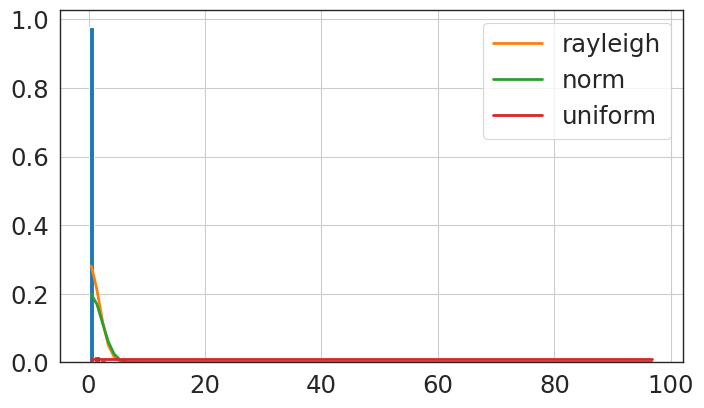

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Amount of precipitation in millimeters (last hour)", kind="hist", bins = 100, aspect = 1.5)
Data = df["Amount of precipitation in millimeters (last hour)"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Atmospheric pressure at station level (mb) Feature***

2024-03-08 21:30:58.432 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-08 21:30:58.451 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-08 21:31:28.476 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-08 21:31:28.489 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-08 21:31:42.685 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.00309)
2024-03-08 21:31:55.169 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.010399)
2024-03-08 21:32:06.555 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.009901)
2024-03-08 21:32:09.669 | WARNING  | fitter.fitter:plo

sumsquare_error          aic          bic    kl_div  ks_statistic  \
norm             0.003090  2397.370807  2425.256458  0.597096      0.122708   
rayleigh         0.009901  1118.705628  1146.591278  2.646771      0.451349   
uniform          0.010399  1061.552371  1089.438021  3.664661      0.543524   
gamma                 inf          inf          inf       inf           NaN   
lognorm               inf          inf          inf       inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
gamma           NaN  
lognorm         NaN

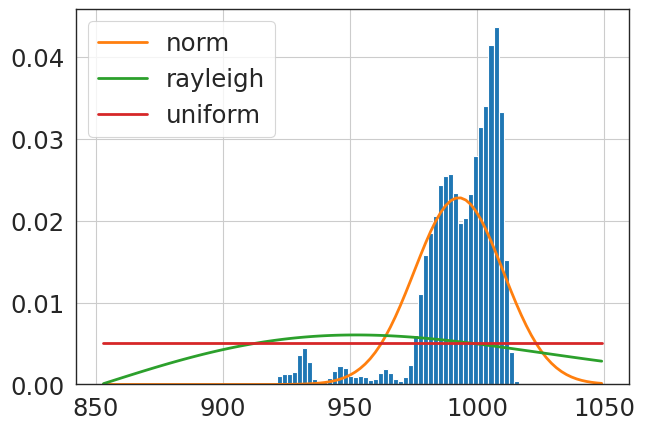

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Atmospheric pressure at station level (mb)", kind="hist", bins = 100, aspect = 1.5)
Data = df["Atmospheric pressure at station level (mb)"].values
f = Fitter(Data,
            distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Maximum air pressure for the last hour in hPa to tenths***

2024-03-08 21:33:14.240 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-08 21:33:14.242 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-08 21:33:44.298 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-08 21:33:44.348 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-08 21:33:58.966 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.002783)
2024-03-08 21:34:12.843 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.009631)
2024-03-08 21:34:27.023 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.009272)
2024-03-08 21:34:30.341 | WARNING  | fitter.fitter:pl

sumsquare_error          aic          bic    kl_div  ks_statistic  \
norm             0.002783  2945.773775  2973.659425  0.579974      0.123093   
rayleigh         0.009272  1143.560934  1171.446585  3.293777      0.465128   
uniform          0.009631  1080.715442  1108.601092  4.343221      0.580470   
lognorm               inf          inf          inf       inf           NaN   
gamma                 inf          inf          inf       inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
lognorm         NaN  
gamma           NaN

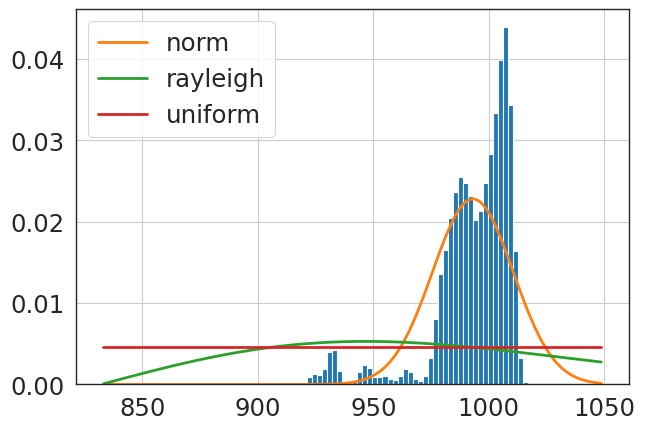

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Maximum air pressure for the last hour in hPa to tenths", kind="hist", bins = 100, aspect = 1.5)
Data = df["Maximum air pressure for the last hour in hPa to tenths"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Minimum air pressure for the last hour in hPa to tenths***

2024-03-08 21:35:40.854 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-08 21:35:40.861 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-08 21:36:10.915 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-08 21:36:10.962 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-08 21:36:28.177 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.00274)
2024-03-08 21:36:41.070 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED rayleigh distribution (taking more than 30 seconds)
2024-03-08 21:36:45.526 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.009543)
2024-03-08 21:36:51.469 | WARNING  | fitter.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm            0.002740  2977.076465  3004.962115     inf      0.122233   
uniform         0.009543  1082.634580  1110.520230     inf      0.579476   
lognorm              inf          inf          inf     inf           NaN   
gamma                inf          inf          inf     inf           NaN   
beta                 inf          inf          inf     inf           NaN   

         ks_pvalue  
norm           0.0  
uniform        0.0  
lognorm        NaN  
gamma          NaN  
beta           NaN

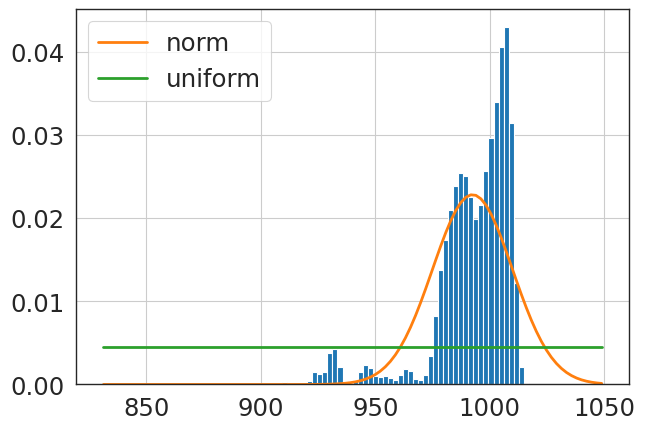

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Minimum air pressure for the last hour in hPa to tenths", kind="hist", bins = 100, aspect = 1.5)
Data = df["Minimum air pressure for the last hour in hPa to tenths"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Solar radiation KJ/m2***

2024-03-09 10:04:08.840 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:04:08.853 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:04:38.908 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:04:38.978 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:04:50.027 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1e-06)
2024-03-09 10:04:58.948 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2e-06)
2024-03-09 10:05:17.378 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-09 10:05:19.690 | WARNING  | fitter.fitter:plot_pdf:41

sumsquare_error           aic           bic    kl_div  ks_statistic  \
rayleigh         0.000001  2.091356e+04  2.094145e+04  0.439571      0.261834   
norm             0.000001  2.407021e+04  2.409810e+04  0.532858      0.305171   
uniform          0.000002  2.148235e+03  2.176120e+03  5.099796      0.910847   
lognorm               inf           inf           inf       inf           NaN   
burr                  inf           inf           inf       inf           NaN   

          ks_pvalue  
rayleigh        0.0  
norm            0.0  
uniform         0.0  
lognorm         NaN  
burr            NaN

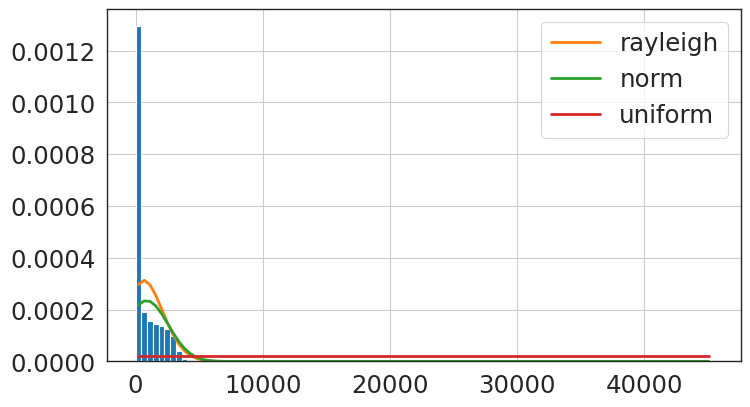

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Solar radiation KJ/m2", kind="hist", bins = 100, aspect = 1.5)
Data = df["Solar radiation KJ/m2"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Air temperature (instant) in celsius degrees***

2024-03-09 08:13:44.853 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 08:13:44.856 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 08:14:14.869 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 08:14:14.879 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 08:14:24.060 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.014654)
2024-03-09 08:14:29.985 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.128888)
2024-03-09 08:14:35.922 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.119759)
2024-03-09 08:14:37.193 | WARNING  | fitter.fitter:pl

sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm             0.014654  2913.235329  2941.120979     inf      0.072285   
rayleigh         0.119759   844.616420   872.502070     inf      0.476445   
uniform          0.128888   791.147906   819.033557     inf      0.554742   
gamma                 inf          inf          inf     inf           NaN   
burr                  inf          inf          inf     inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
gamma           NaN  
burr            NaN

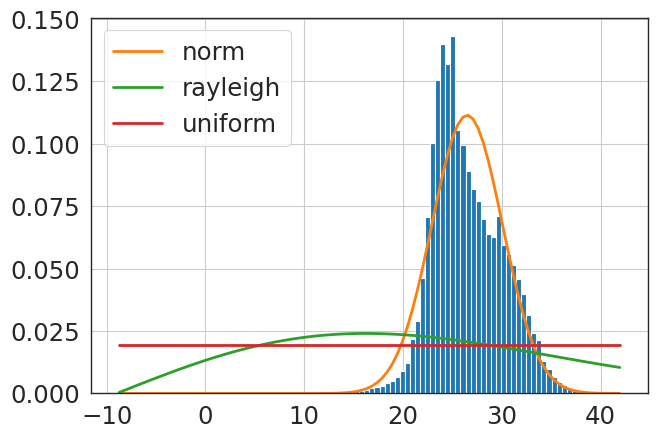

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Air temperature (instant) in celsius degrees", kind="hist", bins = 100, aspect = 1.5)
Data = df["Air temperature (instant) in celsius degrees"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Dew point temperature (instant) in celsius degrees***

2024-03-09 08:15:27.018 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 08:15:27.022 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 08:15:57.042 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 08:15:57.043 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 08:16:09.514 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.10481)
2024-03-09 08:16:22.597 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.270984)
2024-03-09 08:16:23.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.256482)
2024-03-09 08:16:27.348 | WARNING  | fitter.fitter:plo

sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm             0.104810  2683.853964  2711.739614     inf      0.192418   
rayleigh         0.256482   840.949064   868.834714     inf      0.440913   
uniform          0.270984   799.936331   827.821981     inf      0.419589   
gamma                 inf          inf          inf     inf           NaN   
burr                  inf          inf          inf     inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
gamma           NaN  
burr            NaN

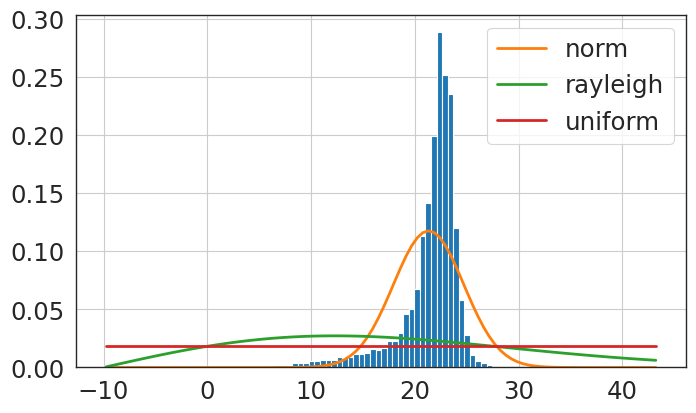

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Dew point temperature (instant) in celsius degrees", kind="hist", bins = 100, aspect = 1.5)
Data = df["Dew point temperature (instant) in celsius degrees"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Maximum dew point temperature for the last hour in celsius degrees***

2024-03-09 08:50:21.262 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 08:50:21.316 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 08:50:51.394 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 08:50:51.432 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 08:51:04.186 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.095928)
2024-03-09 08:51:20.237 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.257058)
2024-03-09 08:51:31.092 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.24302)
2024-03-09 08:51:36.398 | WARNING  | fitter.fitter:plo

sumsquare_error          aic          bic    kl_div  ks_statistic  \
norm             0.095928  2634.610045  2662.495695  0.402977      0.191495   
rayleigh         0.243020   844.346414   872.232064  2.591124      0.444903   
uniform          0.257058   803.272831   831.158481  3.557906      0.422512   
gamma                 inf          inf          inf       inf           NaN   
burr                  inf          inf          inf       inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
gamma           NaN  
burr            NaN

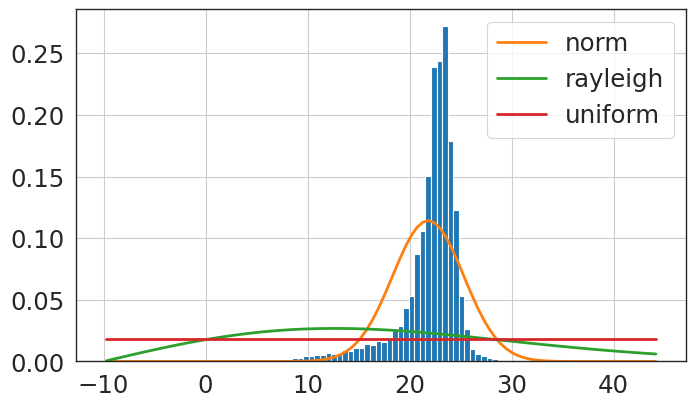

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Maximum dew point temperature for the last hour in celsius degrees", kind="hist", bins = 100, aspect = 1.5)
Data = df["Maximum dew point temperature for the last hour in celsius degrees"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Minimum dew point temperature for the last hour in celsius degrees***

2024-03-09 09:23:51.830 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 09:23:51.837 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 09:24:21.848 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 09:24:21.849 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 09:24:27.951 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.110789)
2024-03-09 09:24:35.640 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.281898)
2024-03-09 09:24:38.878 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.268064)
2024-03-09 09:24:39.997 | WARNING  | fitter.fitter:pl

sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm             0.110789  2475.595556  2503.481206     inf      0.192336   
rayleigh         0.268064   828.718671   856.604321     inf      0.435221   
uniform          0.281898   785.602997   813.488647     inf      0.443923   
gamma                 inf          inf          inf     inf           NaN   
beta                  inf          inf          inf     inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
gamma           NaN  
beta            NaN

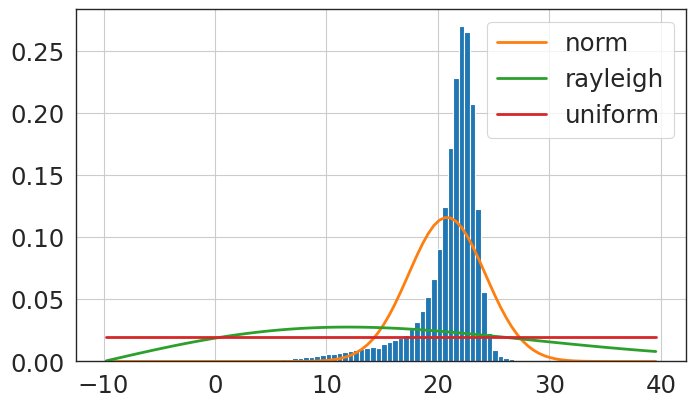

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Minimum dew point temperature for the last hour in celsius degrees", kind="hist", bins = 100, aspect = 1.5)
Data = df["Minimum dew point temperature for the last hour in celsius degrees"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Maximum relative humidity temperature for the last hour in %***

2024-03-09 09:25:25.828 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 09:25:25.835 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 09:25:55.901 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 09:25:56.059 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 09:26:06.363 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.007845)
2024-03-09 09:26:19.535 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.015956)
2024-03-09 09:26:20.809 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.015464)
2024-03-09 09:26:23.357 | WARNING  | fitter.fitter:pl

sumsquare_error          aic          bic    kl_div  ks_statistic  \
norm             0.007845  1233.076870  1260.962520  0.181001      0.120103   
rayleigh         0.015464   984.205947  1012.091597  0.593512      0.280317   
uniform          0.015956   910.519899   938.405549  0.885981      0.442727   
lognorm               inf          inf          inf       inf           NaN   
burr                  inf          inf          inf       inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
lognorm         NaN  
burr            NaN

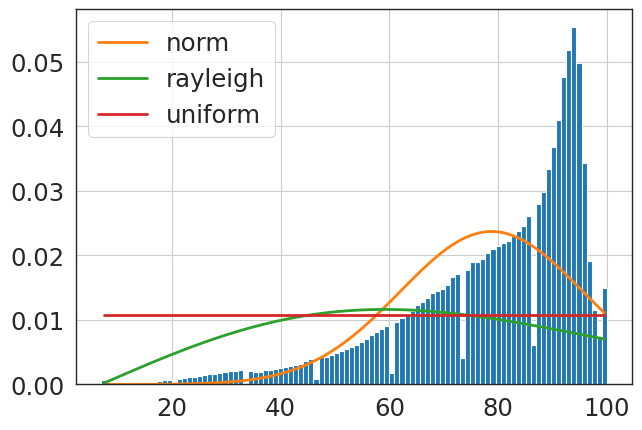

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Maximum relative humidity temperature for the last hour in %", kind="hist", bins = 100, aspect = 1.5)
Data = df["Maximum relative humidity temperature for the last hour in %"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Minimum relative humidity temperature for the last hour in %***

2024-03-09 09:27:24.803 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 09:27:24.804 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 09:27:54.905 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 09:27:54.996 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 09:28:08.731 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.003396)
2024-03-09 09:28:23.862 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.008612)
2024-03-09 09:28:37.437 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.007871)
2024-03-09 09:28:41.013 | WARNING  | fitter.fitter:pl

sumsquare_error          aic          bic    kl_div  ks_statistic  \
norm             0.003396  1140.021594  1167.907244  0.099973      0.089476   
rayleigh         0.007871   982.497064  1010.382714  0.419389      0.236450   
uniform          0.008612   918.942196   946.827846  0.860373      0.370861   
lognorm               inf          inf          inf       inf           NaN   
burr                  inf          inf          inf       inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
lognorm         NaN  
burr            NaN

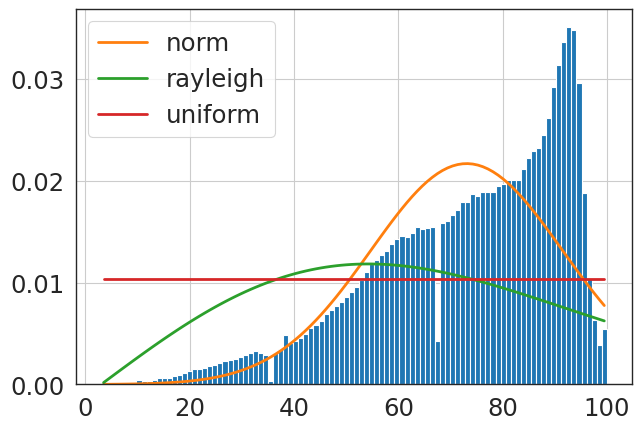

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Minimum relative humidity temperature for the last hour in %", kind="hist", bins = 100, aspect = 1.5)
Data = df["Minimum relative humidity temperature for the last hour in %"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Relative humidity in % (instant)***

2024-03-09 09:29:51.827 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 09:29:51.850 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 09:30:21.974 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 09:30:22.056 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 09:30:40.006 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.005893)
2024-03-09 09:30:55.860 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.012224)
2024-03-09 09:31:03.885 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.011642)
2024-03-09 09:31:09.850 | WARNING  | fitter.fitter:pl

sumsquare_error          aic          bic    kl_div  ks_statistic  \
norm             0.005893  1160.596587  1188.482237  0.156486      0.107190   
rayleigh         0.011642   978.573376  1006.459026  0.488569      0.250784   
uniform          0.012224   910.519899   938.405549  0.793364      0.396301   
gamma                 inf          inf          inf       inf           NaN   
burr                  inf          inf          inf       inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
gamma           NaN  
burr            NaN

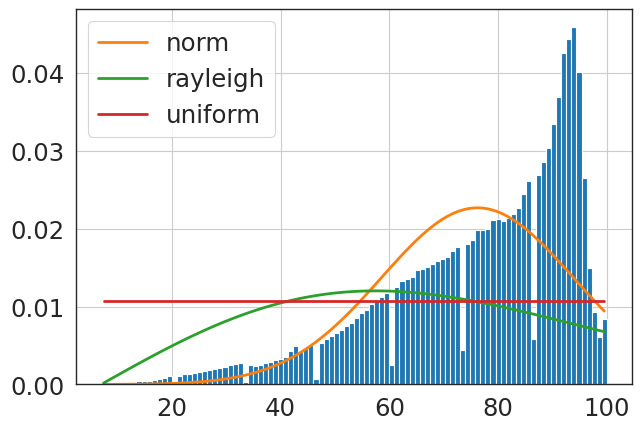

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Relative humidity in % (instant)", kind="hist", bins = 100, aspect = 1.5)
Data = df["Relative humidity in % (instant)"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Wind direction in radius degrees (0-360)***

2024-03-09 09:32:30.365 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 09:32:30.366 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 09:33:00.466 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 09:33:00.832 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 09:33:22.239 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000182)
2024-03-09 09:33:30.849 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED rayleigh distribution (taking more than 30 seconds)
2024-03-09 09:33:40.670 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000125)
2024-03-09 09:33:48.611 | WARNING  | fitter

sumsquare_error          aic          bic    kl_div  ks_statistic  \
uniform         0.000125  1181.220806  1209.106456  0.071250      0.134315   
norm            0.000182  1223.315549  1251.201199  0.120561      0.092113   
gamma                inf          inf          inf       inf           NaN   
lognorm              inf          inf          inf       inf           NaN   
burr                 inf          inf          inf       inf           NaN   

         ks_pvalue  
uniform        0.0  
norm           0.0  
gamma          NaN  
lognorm        NaN  
burr           NaN

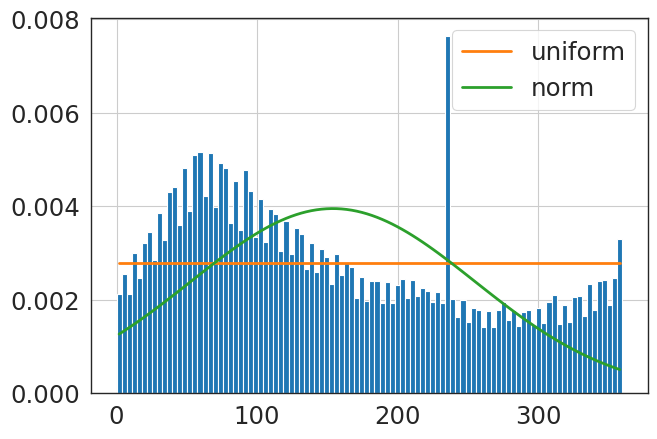

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Wind direction in radius degrees (0-360)", kind="hist", bins = 100, aspect = 1.5)
Data = df["Wind direction in radius degrees (0-360)"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Wind gust in meters per second***

2024-03-09 10:06:24.309 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:06:24.331 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:06:54.326 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:06:54.373 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:07:11.563 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.007856)
2024-03-09 10:07:26.539 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.001759)
2024-03-09 10:07:27.318 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.115521)
2024-03-09 10:07:32.412 | WARNING  | fitter.fitter:pl

sumsquare_error           aic           bic  kl_div  ks_statistic  \
rayleigh         0.001759  2.468211e+04  2.470999e+04     inf      0.048533   
norm             0.007856  4.456785e+04  4.459573e+04     inf      0.079384   
uniform          0.115521  9.244331e+02  9.523188e+02     inf      0.880824   
lognorm               inf           inf           inf     inf           NaN   
burr                  inf           inf           inf     inf           NaN   

          ks_pvalue  
rayleigh        0.0  
norm            0.0  
uniform         0.0  
lognorm         NaN  
burr            NaN

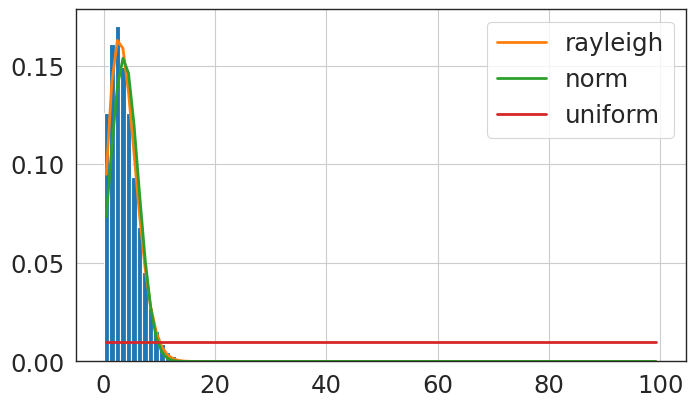

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Wind gust in meters per second", kind="hist", bins = 100, aspect = 1.5)
Data = df["Wind gust in meters per second"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Wind speed in meters per second***

2024-03-09 10:16:43.461 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:16:43.465 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:17:13.477 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:17:13.506 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:17:20.647 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.670947)
2024-03-09 10:17:26.269 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.566979)
2024-03-09 10:17:26.383 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.776792)
2024-03-09 10:17:28.442 | WARNING  | fitter.fitter:pl

sumsquare_error          aic          bic  kl_div  ks_statistic  \
rayleigh         0.566979  5465.749033  5493.634683     inf      0.098853   
norm             0.670947  7926.325838  7954.211488     inf      0.138344   
uniform          1.776792   602.143946   630.029596     inf      0.773981   
lognorm               inf          inf          inf     inf           NaN   
gamma                 inf          inf          inf     inf           NaN   

          ks_pvalue  
rayleigh        0.0  
norm            0.0  
uniform         0.0  
lognorm         NaN  
gamma           NaN

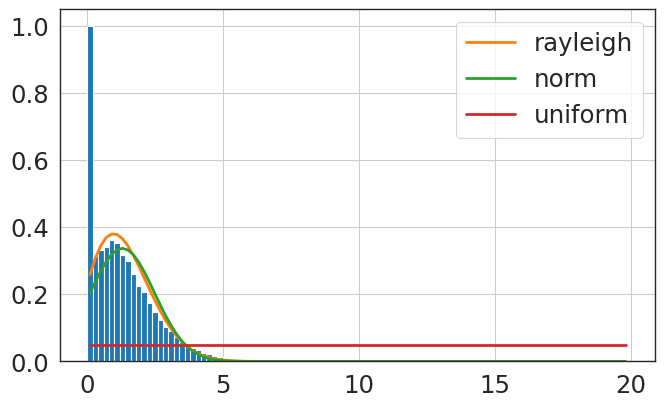

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Wind speed in meters per second", kind="hist", bins = 100, aspect = 1.5)
Data = df["Wind speed in meters per second"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***latitude***

2024-03-09 10:18:45.775 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:18:45.786 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:19:15.796 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:19:15.818 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:19:25.495 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.378496)
2024-03-09 10:19:32.063 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.384876)
2024-03-09 10:19:34.391 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.419046)
2024-03-09 10:19:38.155 | WARNING  | fitter.fitter:pl

sumsquare_error         aic         bic  kl_div  ks_statistic  \
norm             0.378496  636.456414  664.342064     inf      0.111480   
rayleigh         0.384876  620.716924  648.602574     inf      0.142184   
uniform          0.419046  573.307838  601.193488     inf      0.238651   
gamma                 inf         inf         inf     inf           NaN   
lognorm               inf         inf         inf     inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
gamma           NaN  
lognorm         NaN

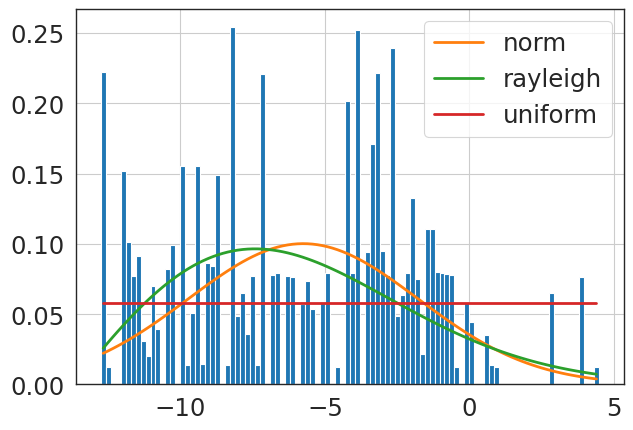

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="latitude", kind="hist", bins = 100, aspect = 1.5)
Data = df["latitude"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***longitude***

2024-03-09 10:20:40.489 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:20:40.498 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:21:10.562 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:21:10.583 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:21:23.577 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.334046)
2024-03-09 10:21:33.349 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.345437)
2024-03-09 10:21:36.202 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.324494)
2024-03-09 10:21:41.460 | WARNING  | fitter.fitter:pl

sumsquare_error         aic         bic  kl_div  ks_statistic  \
uniform          0.324494  662.177272  690.062922     inf      0.295336   
norm             0.334046  724.626210  752.511860     inf      0.196687   
rayleigh         0.345437  706.984479  734.870129     inf      0.212241   
gamma                 inf         inf         inf     inf           NaN   
lognorm               inf         inf         inf     inf           NaN   

          ks_pvalue  
uniform         0.0  
norm            0.0  
rayleigh        0.0  
gamma           NaN  
lognorm         NaN

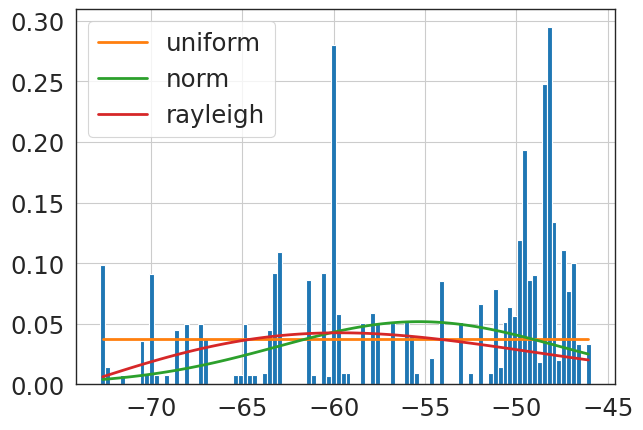

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="longitude", kind="hist", bins = 100, aspect = 1.5)
Data = df["longitude"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***height***

2024-03-09 10:25:26.392 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.000161)
2024-03-09 10:25:28.048 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:25:56.397 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:25:58.075 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:26:02.731 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000236)
2024-03-09 10:26:06.561 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000381)
2024-03-09 10:26:08.653 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.000205)
2024-03-09 10:26:09.565 | WARNING  | fitter.fitter:plot_pdf:417

sumsquare_error          aic          bic    kl_div  ks_statistic  \
lognorm          0.000161  1533.317880  1575.146355  0.534183      0.077834   
rayleigh         0.000205  1625.315928  1653.201579  0.813656      0.164199   
norm             0.000236  1650.795909  1678.681559  0.961476      0.159583   
uniform          0.000381  1337.919922  1365.805572  2.442494      0.554429   
gamma                 inf          inf          inf       inf           NaN   

          ks_pvalue  
lognorm         0.0  
rayleigh        0.0  
norm            0.0  
uniform         0.0  
gamma           NaN

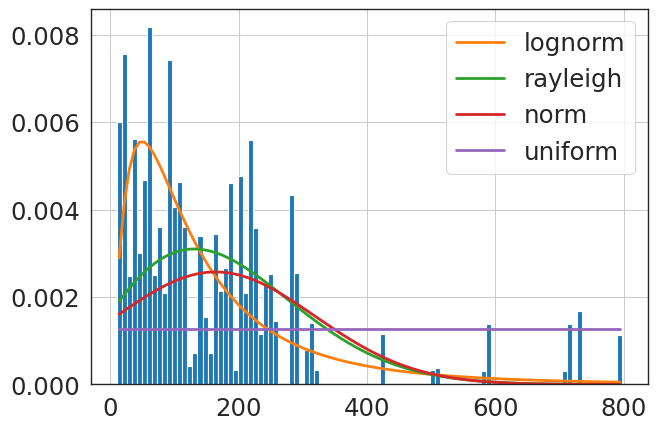

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="height", kind="hist", bins = 100, aspect = 1.5)
Data = df["height"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***year***

2024-03-09 10:26:51.712 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:26:51.713 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:27:21.756 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:27:21.762 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:27:29.684 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1.347284)
2024-03-09 10:27:36.608 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.437496)
2024-03-09 10:27:42.398 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.416335)
2024-03-09 10:27:44.653 | WARNING  | fitter.fitter:pl

sumsquare_error         aic         bic  kl_div  ks_statistic  \
norm             1.347284  807.975768  835.861418     inf      0.119753   
rayleigh         1.416335  672.071079  699.956729     inf      0.229120   
uniform          1.437496  612.904488  640.790138     inf      0.363306   
lognorm               inf         inf         inf     inf           NaN   
gamma                 inf         inf         inf     inf           NaN   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
uniform         0.0  
lognorm         NaN  
gamma           NaN

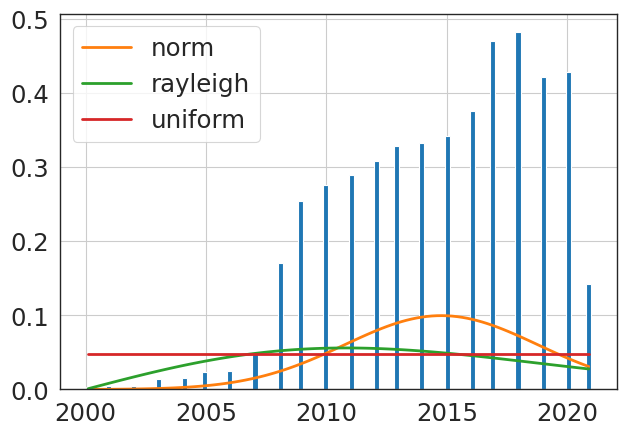

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="year", kind="hist", bins = 100, aspect = 1.5)
Data = df["year"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***month***

2024-03-09 10:28:42.322 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:28:42.333 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:29:12.391 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:29:12.391 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:29:23.445 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=6.224113)
2024-03-09 10:29:33.083 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6.068337)
2024-03-09 10:29:36.845 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=6.212092)
2024-03-09 10:29:40.075 | WARNING  | fitter.fitter:pl

sumsquare_error         aic         bic  kl_div  ks_statistic  \
uniform          6.068337  483.579055  511.464705     inf      0.087249   
rayleigh         6.212092  516.162288  544.047938     inf      0.111727   
norm             6.224113  520.416961  548.302612     inf      0.102626   
gamma                 inf         inf         inf     inf           NaN   
lognorm               inf         inf         inf     inf           NaN   

          ks_pvalue  
uniform         0.0  
rayleigh        0.0  
norm            0.0  
gamma           NaN  
lognorm         NaN

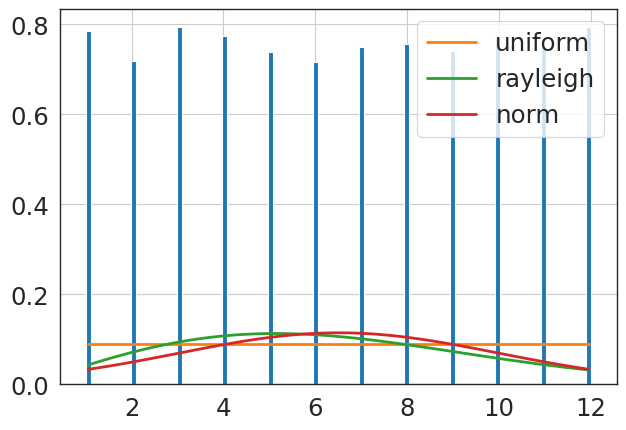

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="month", kind="hist", bins = 100, aspect = 1.5)
Data = df["month"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***day***

2024-03-09 10:30:47.389 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:30:47.402 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:31:17.506 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:31:17.582 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:31:31.203 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.264967)
2024-03-09 10:31:43.299 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.249389)
2024-03-09 10:31:49.508 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.263475)
2024-03-09 10:31:56.465 | WARNING  | fitter.fitter:pl

sumsquare_error         aic         bic  kl_div  ks_statistic  \
uniform          0.249389  684.239476  712.125126     inf      0.032756   
rayleigh         0.263475  714.988216  742.873866     inf      0.085175   
norm             0.264967  719.659905  747.545555     inf      0.073339   
gamma                 inf         inf         inf     inf           NaN   
lognorm               inf         inf         inf     inf           NaN   

          ks_pvalue  
uniform         0.0  
rayleigh        0.0  
norm            0.0  
gamma           NaN  
lognorm         NaN

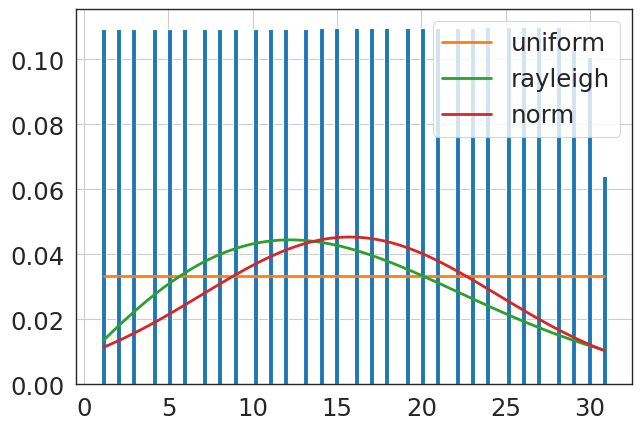

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="day", kind="hist", bins = 100, aspect = 1.5)
Data = df["day"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***hour***

2024-03-09 10:35:57.593 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-09 10:35:57.609 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-09 10:36:27.648 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-09 10:36:27.726 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-09 10:36:43.247 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.628308)
2024-03-09 10:36:58.049 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.598614)
2024-03-09 10:37:04.739 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.625723)
2024-03-09 10:37:10.522 | WARNING  | fitter.fitter:pl

sumsquare_error         aic         bic  kl_div  ks_statistic  \
uniform          0.598614  631.098843  658.984493     inf      0.041667   
rayleigh         0.625723  662.089242  689.974892     inf      0.090099   
norm             0.628308  666.724850  694.610500     inf      0.078228   
gamma                 inf         inf         inf     inf           NaN   
lognorm               inf         inf         inf     inf           NaN   

          ks_pvalue  
uniform         0.0  
rayleigh        0.0  
norm            0.0  
gamma           NaN  
lognorm         NaN

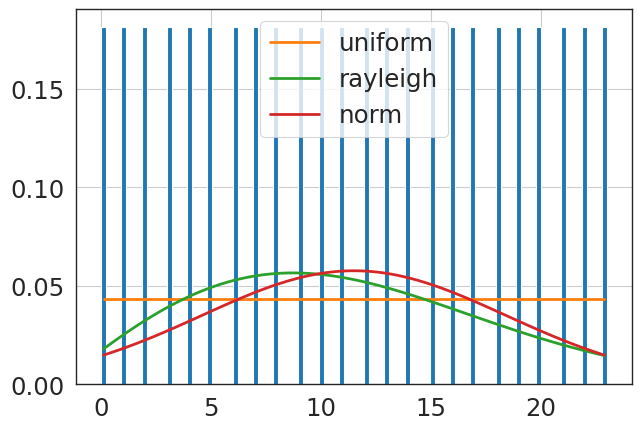

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="hour", kind="hist", bins = 100, aspect = 1.5)
Data = df["hour"].values
f = Fitter(Data,
           distributions=['gamma','lognorm',"beta","burr","rayleigh","norm", "uniform"])
f.fit()
f.summary()
# f.get_best(method = 'sumsquare_error')


***Scaling according to Distrubition of each feature***

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd

# Assuming your DataFrame is named df

input_path =  '/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english_interpolated.csv'
df = pd.read_csv(input_path)
df.head()
features_to_minmax_scale = ['day','hour','month','year']
features_to_standard_scale = [
    'Dew point temperature (instant) in celsius degrees',
    'Relative humidity in % (instant)',
    'latitude',
    'longitude',
    'Amount of precipitation in millimeters (last hour)',
    'Atmospheric pressure at station level (mb)',
    'Maximum air pressure for the last hour in hPa to tenths',
    'Minimum air pressure for the last hour in hPa to tenths',
    'Solar radiation KJ/m2',
    'Maximum dew point temperature for the last hour in celsius degrees',
    'Minimum dew point temperature for the last hour in celsius degrees',
    'Maximum relative humidity temperature for the last hour in %',
    'Minimum relative humidity temperature for the last hour in %',
    'Wind gust in meters per second',
    'Wind speed in meters per second',
    'height'
]

minmax_scaler = MinMaxScaler()
standard_scalar = StandardScaler()

# Min-Max Scaling
df[features_to_minmax_scale] = minmax_scaler.fit_transform(df[features_to_minmax_scale])

# Robust Scaling
df[features_to_standard_scale] = standard_scalar.fit_transform(df[features_to_standard_scale])

# Assuming your DataFrame is named df
output_path = '/content/drive/Shareddrives/Machine_Learning Data cleaning/north_Final.csv'

# Save the DataFrame to CSV
df.to_csv(output_path, index=False)
df.head()

hour  Amount of precipitation in millimeters (last hour)  \
0  0.913043                                          -0.149752    
1  0.956522                                          -0.149752    
2  1.000000                                          -0.149752    
3  0.000000                                          -0.149752    
4  0.043478                                          -0.149752    

   Atmospheric pressure at station level (mb)  \
0                                    0.561579   
1                                    0.573018   
2                                    0.630215   
3                                    0.675972   
4                                    0.727449   

   Maximum air pressure for the last hour in hPa to tenths  \
0                                           0.553969         
1                                           0.553969         
2                                           0.611175         
3                                           0.656939         
4                                           0.708424         

   Minimum air pressure for the last hour in hPa to tenths  \
0                                           0.581390         
1                                           0.575669         
2                                           0.592832         
3                                           0.655764         
4                                           0.695811         

   Solar radiation KJ/m2  Air temperature (instant) in celsius degrees  \
0              -0.282262                                          29.4   
1              -0.401224                                          26.9   
2              -0.400182                                          25.5   
3              -0.399140                                          25.0   
4              -0.398098                                          24.7   

   Dew point temperature (instant) in celsius degrees  \
0                                           0.520993    
1                                           0.815565    
2                                           0.756651    
3                                           0.756651    
4                                           0.638822    

   Maximum dew point temperature for the last hour in celsius degrees  \
0                                           0.424569                    
1                                           0.710917                    
2                                           0.653647                    
3                                           0.653647                    
4                                           0.596378                    

   Minimum dew point temperature for the last hour in celsius degrees  ...  \
0                                           0.518802                   ...   
1                                           0.576923                   ...   
2                                           0.664105                   ...   
3                                           0.838469                   ...   
4                                           0.780348                   ...   

   Relative humidity in % (instant)  Wind direction in radius degrees (0-360)  \
0                         -0.409669                                      96.0   
1                          0.442728                                     184.0   
2                          0.840513                                     300.0   
3                          0.954166                                       3.0   
4                          0.954166                                     170.0   

   Wind gust in meters per second  Wind speed in meters per second  latitude  \
0                       -0.289254                        -0.412167  0.663933   
1                       -0.675452                        -1.003335  0.663933   
2                       -0.829931                        -1.003335  0.663933   
3                       -1.100270                        -0.

# ***Dataset size and metrics post cleaning :***

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset from the file
file_path = '/content/drive/Shareddrives/Machine_Learning Data cleaning/north_Final.csv'
cleaned_df = pd.read_csv(file_path)

# Display information about the cleaned dataset
print("Size of the cleaned dataset:")
num_rows, num_columns = cleaned_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display data types of each column
print("\nData types of each column:")
print(cleaned_df.dtypes)


# Display the number of missing values for each column in the cleaned dataset
missing_values = cleaned_df.isnull().sum()
print("\nNumber of missing values for each column in the cleaned dataset:")
print(missing_values)

# Get the file size in bytes
file_size_bytes = os.path.getsize(file_path)

# # Convert bytes to megabytes or gigabytes
file_size_megabytes = file_size_bytes / (1024 ** 2)  # 1 megabyte = 1024 kilobytes
file_size_gigabytes = file_size_bytes / (1024 ** 3)  # 1 gigabyte = 1024 megabytes

# Display the size of the dataset
print(f"\nSize of the dataset: {file_size_megabytes:.6f} MB or {file_size_gigabytes:.6f} GB")


Size of the cleaned dataset:
Number of rows: 8392299
Number of columns: 22

Data types of each column:
hour                                                                  float64
Amount of precipitation in millimeters (last hour)                    float64
Atmospheric pressure at station level (mb)                            float64
Maximum air pressure for the last hour in hPa to tenths               float64
Minimum air pressure for the last hour in hPa to tenths               float64
Solar radiation KJ/m2                                                 float64
Air temperature (instant) in celsius degrees                          float64
Dew point temperature (instant) in celsius degrees                    float64
Maximum dew point temperature for the last hour in celsius degrees    float64
Minimum dew point temperature for the last hour in celsius degrees    float64
Maximum relative humidity temperature for the last hour in %          float64
Minimum relative humidity temperature f

# ***Missing Values Post cleaning ***

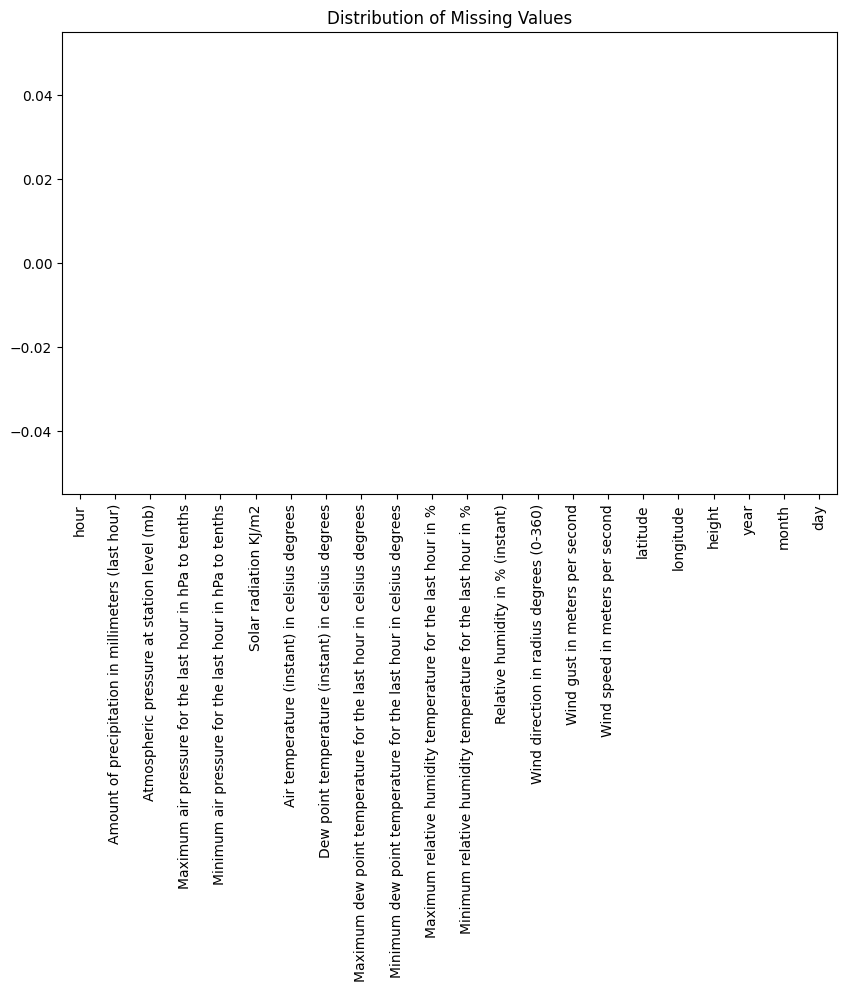

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset from the file
file_path = '/content/drive/Shareddrives/Machine_Learning Data cleaning/north_english_interpolated_scaled.csv'
df = pd.read_csv(file_path)

missing_values_distribution = df.isnull().sum()
missing_values_distribution.plot(kind='bar', figsize=(10, 6), title='Distribution of Missing Values')
plt.show()
